In [54]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import praw
import matplotlib.pyplot as plt
import seaborn as sns
import config

from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

### Visualizing relationships in subreddits and redditors 

### Analyzing the most popular and the most unpopular redditors in r/dataisbeautiful's "hot" 
Loading the score and number of comments of the redditors in the 100 hottest r/dataisbeautiful submissions. 

In [69]:
# loading the top 100 submissions dataframe 

hot_redditors = pd.read_csv('top100_top_redditors_2020-05-10.csv', index_col=0)

# loading the 2 dataframe with the top 25 most un/popular redditors 
top = pd.read_csv('positive_redditors_2020-05-10.csv', index_col=0)
top['pos_or_neg'] = 1
bottom = pd.read_csv('negative_redditors_2020-05-10.csv', index_col=0)
bottom['pos_or_neg'] = 0

In [56]:
# merging positive and negative for comparability 
pos_and_neg = positive.reset_index().merge(negative.reset_index(),how='outer')

In [57]:
pos_and_neg['created'] = pd.to_datetime(pos_and_neg['created'])

In [58]:
pos_and_neg['age'] = pos_and_neg['created'].apply(lambda x: 2020 - x.year)

In [59]:
pos_and_neg.head()

,index,created,link_karma,comment_karma,pos_or_neg,age
0,zkgkilla,2016-01-18 06:50:34,4377,9819,1,4
1,strumthebuilding,2012-10-13 17:40:00,218,6675,1,8
2,steevie265,2018-07-11 05:40:43,38,3145,1,2
3,zipflop,2013-02-12 11:51:37,12676,25675,1,7
4,JPAnalyst,2018-02-15 04:56:39,27007,35139,1,2


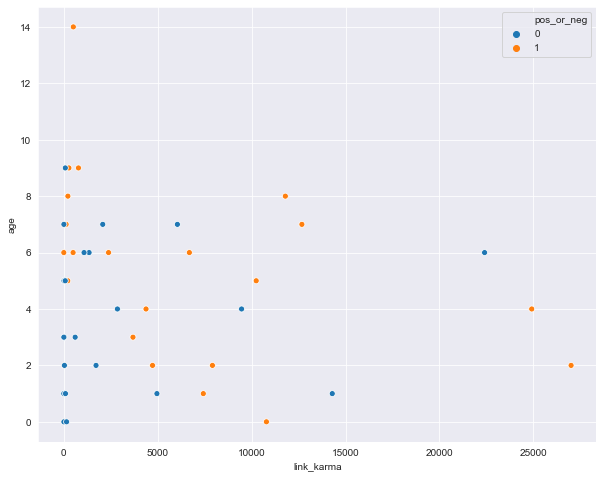

In [60]:
plt.figure(figsize=(10,8)) 
sns.set_style('darkgrid')
plt.tight_layout()
sns.scatterplot(data=pos_and_neg, 
                x='link_karma', 
                y='age', 
                hue='pos_or_neg')

In [77]:
def log_scatter(dataframe):
    plt.figure(figsize=(10,8))
    plt.xscale('log')
    plt.yscale('log')
    sns.set_style('darkgrid')
    sns.scatterplot(data=dataframe, 
                    x='link_karma', 
                    y='comment_karma', 
                    hue='pos_or_neg')

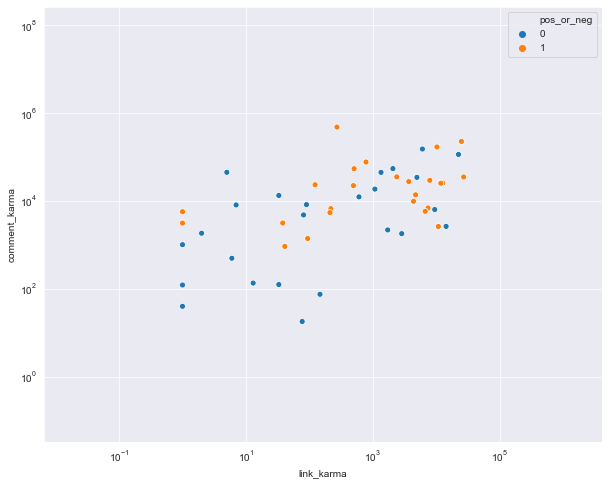

In [76]:
log_scatter(pos_and_neg)

In [63]:
# regplot function
def reg_plotter(dataframe, x_value, y_value):
    plt.figure(figsize=(10,(8)))
    plt.tight_layout()
    sns.set_style('darkgrid')
    sns.regplot(data=dataframe, x=x_value, y=y_value)

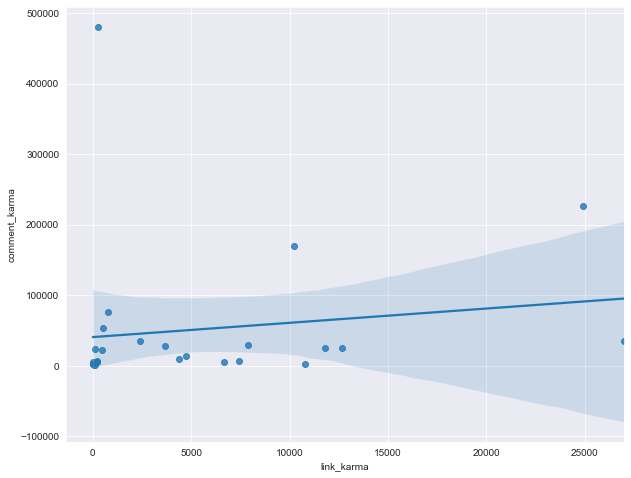

In [70]:
reg_plotter(top, 'link_karma', 'comment_karma')

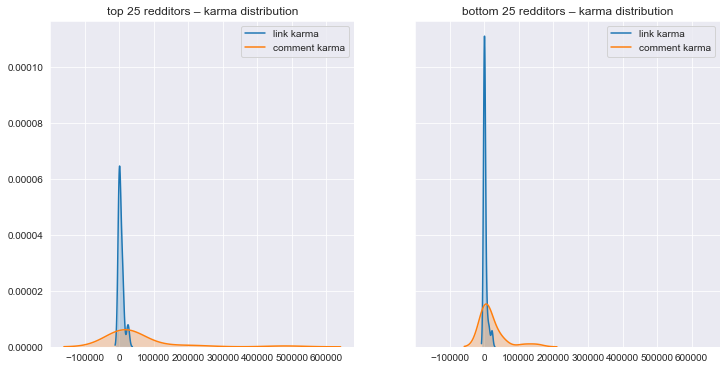

In [71]:
# creating subplots for the distribution differences between top and bottom 25 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,6), sharex=True, sharey=True)
ax1.set_title('top 25 redditors – karma distribution')
sns.kdeplot(top['link_karma'], shade=True, label=f'link karma', ax=ax1)
sns.kdeplot(top['comment_karma'], shade=True, label= f'comment karma', ax=ax1)
ax2.set_title('bottom 25 redditors – karma distribution')
sns.kdeplot(bottom['link_karma'], shade=True, label=f'link karma', ax=ax2)
sns.kdeplot(bottom['comment_karma'], shade=True, label= f'comment karma', ax=ax2)

### Distplot observations:
- there's a smaller distribution of link karma and, generally, most of the karma is in the region of 50k 
- comment karma is much more distributed and quite a few have achieved high karma numbers through their comments 

### top 25 weekly redditors observation
- can there be found general types within the top 25 redditors?
    - how many are "mostly commenting"? Are there redditors who mostly submit in the top? 
    - are there age groups? how would you group them? 
- there are redditors who almost exclusively comment without sharing links/creating submissions on their own 